## ARMA model

In [14]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(11)

ar1 = np.array([1, -0.33])
ma1 = np.array([1, 0.9])

ARMA_1_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

In [15]:
from statsmodels.tsa.stattools import adfuller

ADF_test_results = adfuller(ARMA_1_1)

print(f"ADF stats: {ADF_test_results[0]}")
print(f"p-value: {ADF_test_results[1]}")

ADF stats: -6.214509786526415
p-value: 5.406640272939692e-08


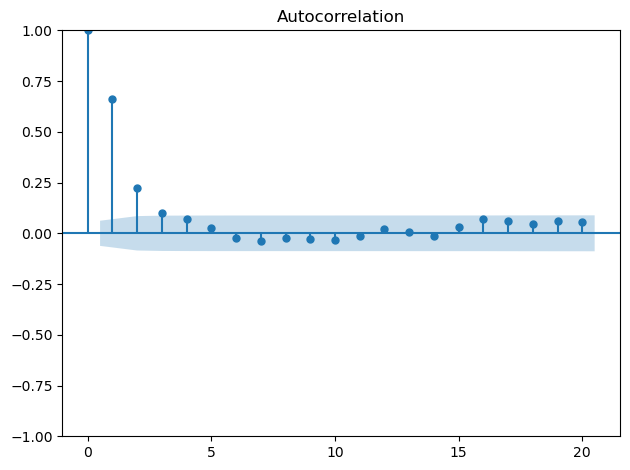

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(ARMA_1_1, lags=20)

plt.tight_layout()

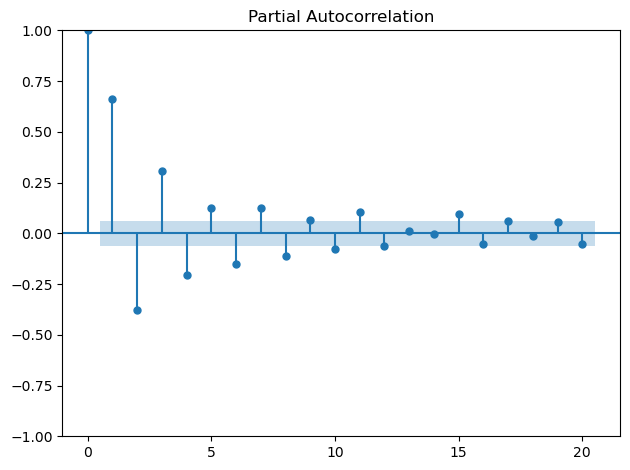

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(ARMA_1_1, lags=20)

plt.tight_layout()

### Select model using AIC (Akaike information criterion)

In [18]:
from itertools import product

ps = range(0, 4, 1)
qs = range(0, 4, 1)

order_list = list(product(ps, qs))

In [24]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:

    results = []
    for order in tqdm(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        
        except:
            continue
        
        aic = model.aic
        results.append([order, aic])

    results_df = pd.DataFrame(results)
    results_df.columns = ["(p, q)", "AIC"]

    results_df = results_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return results_df

In [25]:
result_df = optimize_ARMA(ARMA_1_1, order_list=order_list)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,"(p, q)",AIC
0,"(1, 1)",2859.243111
1,"(1, 2)",2861.010893
2,"(2, 1)",2861.033659
3,"(0, 3)",2862.167005
4,"(1, 3)",2862.696943
5,"(3, 1)",2862.885154
6,"(2, 2)",2863.101375
7,"(2, 3)",2864.641728
8,"(3, 2)",2865.004100
9,"(3, 3)",2865.164784


In [26]:
model = SARIMAX(ARMA_1_1, order=(1, 0, 1), simple_differencing=False)
model_fit = model.fit(disp=False)
residuals = model_fit.resid

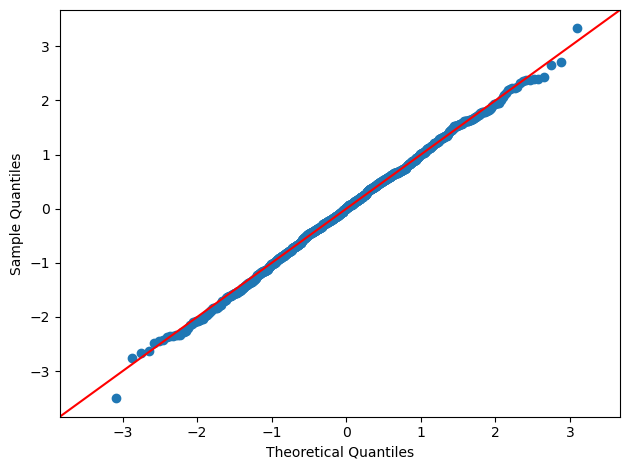

In [28]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line="45")

plt.tight_layout()

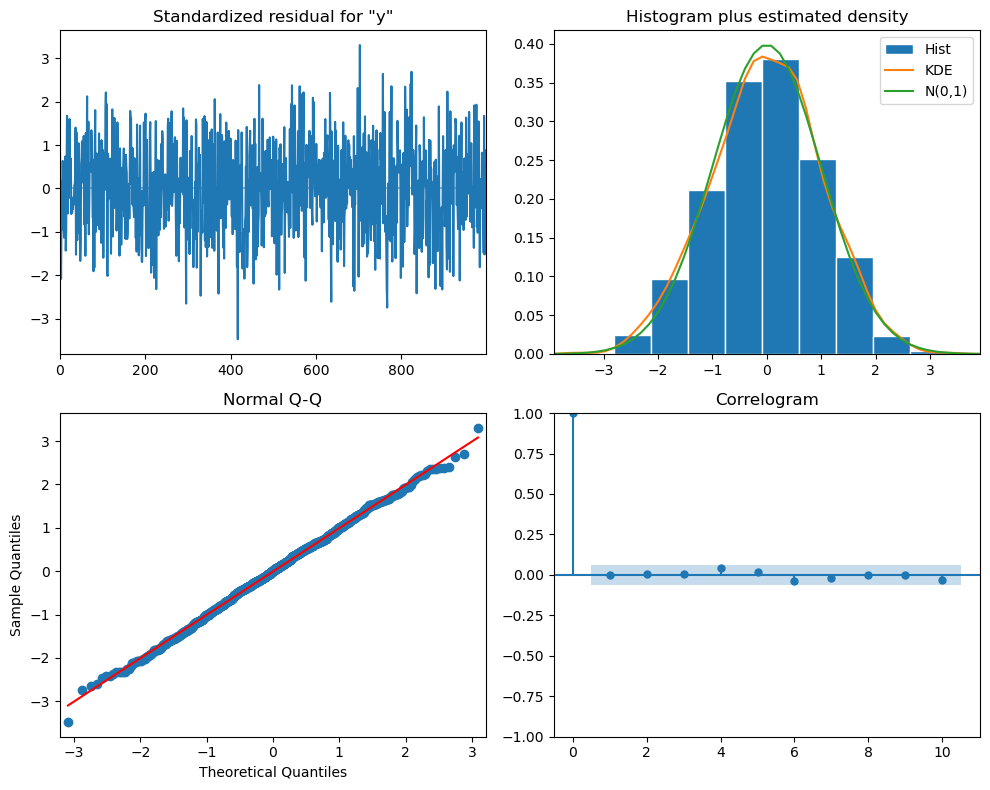

In [30]:
model_fit.plot_diagnostics(figsize=(10, 8))
plt.tight_layout()

In [34]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljungbox_df = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(ljungbox_df)

     lb_stat  lb_pvalue
1   0.006277   0.936854
2   0.030051   0.985087
3   0.042823   0.997673
4   1.698295   0.791027
5   2.094094   0.835978
6   3.437176   0.752309
7   3.742422   0.808921
8   3.742937   0.879540
9   3.746106   0.927315
10  4.719667   0.909101
